In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import numpy as np
!pip install numpy matplotlib
import matplotlib.pyplot as plt

In [ ]:
#загружаем файлы с диска
import requests
from urllib.parse import urlencode

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/mksPfmDDJHKDOg'

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Загружаем файл и сохраняем его
download_response = requests.get(download_url)
with open('dataset.zip', 'wb') as f:
    f.write(download_response.content)

In [ ]:
#разархивировать полученные данные
import zipfile

# Путь к вашему архиву .zip
zip_path = '/content/dataset.zip'

# Папка, в которую вы хотите извлечь файлы
extracted_folder = '/content/dataset'

# Создайте папку для извлечения файлов (если она не существует)
os.makedirs(extracted_folder, exist_ok=True)

# Распаковка архива
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print("Архив успешно разархивирован.")

Архив успешно разархивирован.


In [ ]:
# Папка с изображениями
image_folder_path = extracted_folder + '/train/images'

# Папка с файлами меток (предполагаем, что названия файлов совпадают с названиями изображений без расширений)
label_folder_path = extracted_folder+'/train/labels'

# Получение списков файлов изображений и меток
image_files = sorted([f for f in os.listdir(image_folder_path) if f.endswith('.jpg') or f.endswith('.png')])
label_files = sorted([f for f in os.listdir(label_folder_path) if f.endswith('.txt')])

# Проверка соответствия файлов
assert len(image_files) == len(label_files), "Количество файлов изображений и меток не совпадает."

# Сопоставление файлов изображений и меток
data_pairs = [(os.path.join(image_folder_path, img), os.path.join(label_folder_path, label)) for img, label in zip(image_files, label_files)]

# Разделение на обучающую, валидационную и тестовую выборки
data_pairs_train, data_pairs_temp = train_test_split(data_pairs, test_size=0.2, random_state=34)
data_pairs_val, data_pairs_test = train_test_split(data_pairs_temp, test_size=0.5, random_state=34)

#для равномерно распределенных наборов данных
#data_pairs_train, data_pairs_temp = train_test_split(data_pairs, test_size=0.3, stratify=[label for _, label in data_pairs], random_state=34)
#data_pairs_val, data_pairs_test = train_test_split(data_pairs_temp, test_size=0.5, stratify=[label for _, label in data_pairs_temp], random_state=34)

In [ ]:
# Функция для вывода распределения классов в выборке
def plot_class_distribution(labels_files, dataset_name):
    # Извлечение меток классов
    labels = []
    for label_file in labels_files:
       with open(os.path.join(label_folder_path, label_file), 'r') as file:
          for line in file:
              # Разделение строки на числа и добавление первого числа в список меток
              label = line.split()[0]
              labels.append(label)
    unique_classes, counts = np.unique(labels, return_counts=True)
    # Получение реальных меток классов (предполагаем, что метки - целые числа)
    class_labels = [int(label) for label in unique_classes]

    plt.bar(class_labels, counts)
    plt.title("Class distribution " + dataset_name)
    plt.xlabel("Class")
    plt.ylabel("Number of samples")
    plt.xticks(class_labels)  # Устанавливаем метки классов на оси x
    plt.show()

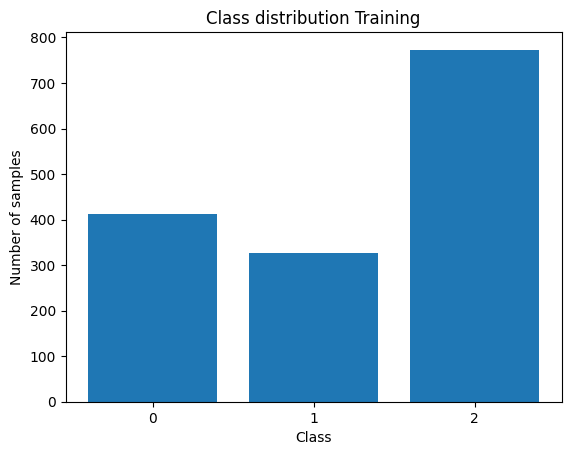

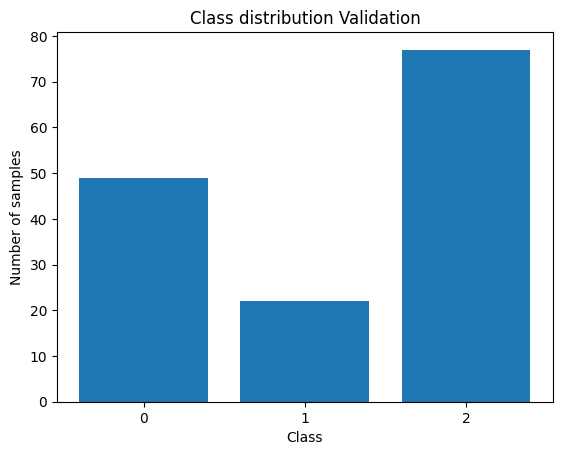

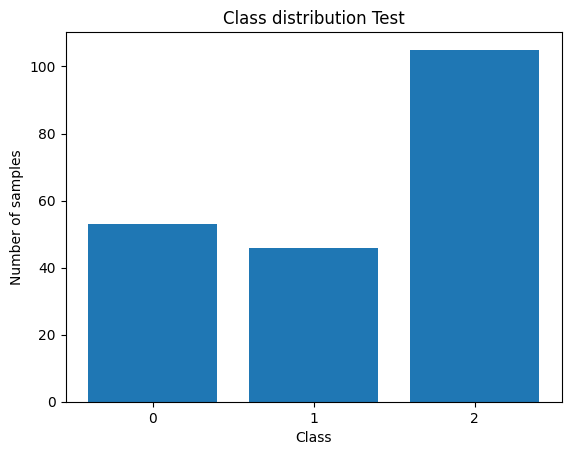

In [ ]:
# Извлечение массивов из меток
labels_train = [label for _, label in data_pairs_train]
labels_val = [label for _, label in data_pairs_val]
labels_test = [label for _, label in data_pairs_test]

# Вывод распределения классов для обучающей, валидационной и тестовой выборок
plot_class_distribution(labels_train, "Training")
plot_class_distribution(labels_val, "Validation")
plot_class_distribution(labels_test, "Test")

## Если выборка подходит, то можно копировать файлы по папкам (и далее опять проверить распределение классов уже в папках)

In [ ]:
import shutil

In [ ]:
#функция для копирования файлов
def copy_files(source_folder, destination_folder, file_list):
    for file_name in file_list:
        source_path = os.path.join(source_folder, file_name)
        destination_path = os.path.join(destination_folder, file_name)
        shutil.copy2(source_path, destination_path)

In [ ]:
new_dataset_root = '/content/new_dataset'

# Копирование файлов для обучающей выборки
new_train_folder = os.path.join(new_dataset_root, 'train', 'images')
os.makedirs(new_train_folder, exist_ok=True)
copy_files(image_folder_path, new_train_folder, [os.path.basename(img) for img, _ in data_pairs_train])
new_train_folder = os.path.join(new_dataset_root, 'train', 'labels')
os.makedirs(new_train_folder, exist_ok=True)
copy_files(label_folder_path, new_train_folder, [os.path.basename(label) for _, label in data_pairs_train])

# Копирование файлов для валидационной выборки
new_val_folder = os.path.join(new_dataset_root, 'val', 'images')
os.makedirs(new_val_folder, exist_ok=True)
copy_files(image_folder_path, new_val_folder, [os.path.basename(img) for img, _ in data_pairs_val])
new_val_folder = os.path.join(new_dataset_root, 'val', 'labels')
os.makedirs(new_val_folder, exist_ok=True)
copy_files(label_folder_path, new_val_folder, [os.path.basename(label) for _, label in data_pairs_val])

# Копирование файлов для тестовой выборки
new_test_folder = os.path.join(new_dataset_root, 'test', 'images')
os.makedirs(new_test_folder, exist_ok=True)
copy_files(image_folder_path, new_test_folder, [os.path.basename(img) for img, _ in data_pairs_test])
new_test_folder = os.path.join(new_dataset_root, 'test', 'labels')
os.makedirs(new_test_folder, exist_ok=True)
copy_files(label_folder_path, new_test_folder, [os.path.basename(label) for _, label in data_pairs_test])

In [ ]:
#функция для показа распределения классов в каждой выборке(папке)
def get_class_distribution(label_folder_path, name):
    # Получение списка файлов с метками
    label_files = [f for f in os.listdir(label_folder_path) if f.endswith('.txt')]

    # Извлечение меток классов
    labels = []
    for label_file in label_files:
       with open(os.path.join(label_folder_path, label_file), 'r') as file:
          for line in file:
              # Разделение строки на числа и добавление первого числа в список меток
              label = line.split()[0]
              labels.append(label)    # Вывод распределения классов
    unique_classes, counts = np.unique(labels, return_counts=True)

    # Получение реальных меток классов (предполагаем, что метки - целые числа)
    class_labels = [int(label) for label in unique_classes]

    plt.bar(class_labels, counts)
    plt.title("Class distribution" +" " + name)
    plt.xlabel("Class")
    plt.ylabel("Number of samples")
    plt.xticks(class_labels)  # Устанавливаем метки классов на оси x
    plt.show()

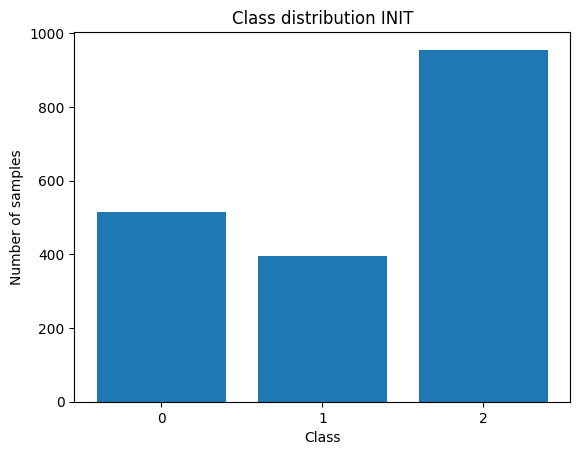

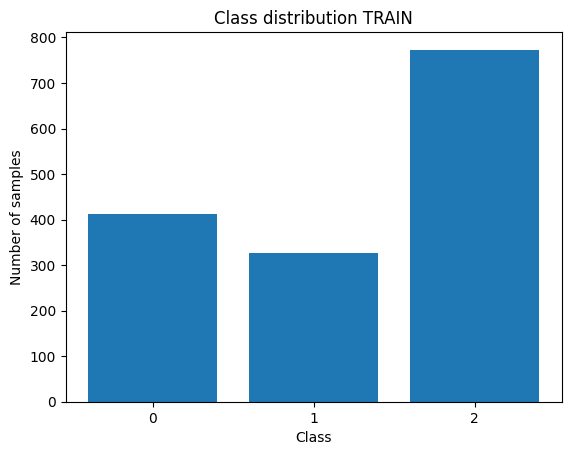

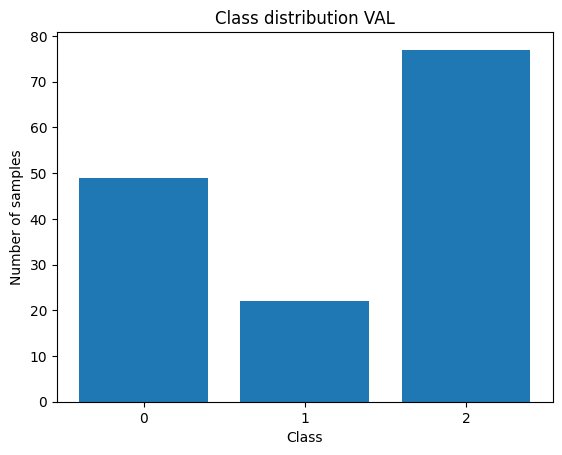

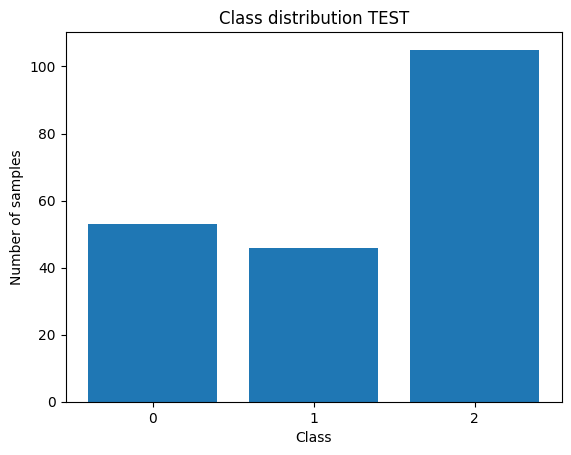

In [ ]:
# Вывод распределения классов для обучающей, валидационной и тестовой выборок
# Папка с файлами меток для обучающей выборки
label_folder_train = new_dataset_root+'/train/labels'

# Папка с файлами меток для валидационной выборки
label_folder_val = new_dataset_root+'/val/labels'

# Папка с файлами меток для тестовой выборки
label_folder_test = new_dataset_root+'/test/labels'

# Папка с файлами меток для начальной выборки
label_folder_init = '/content/dataset/train/labels'

# Вывод распределения классов для каждой выборки
get_class_distribution(label_folder_init, "INIT")
get_class_distribution(label_folder_train, "TRAIN")
get_class_distribution(label_folder_val, "VAL")
get_class_distribution(label_folder_test, "TEST")